In [1]:
## Data frame 
import pandas as pd

import numpy as np
from patsy import dmatrices

from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.regression.linear_model import OLSResults

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from vecstack import stacking

%matplotlib inline
plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)


C:\Users\schoo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\schoo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## Read in the Data 

In [2]:
main_df = pd.read_excel("main_data.xlsx")

In [3]:
main_df = main_df.drop(columns = "Unnamed: 0")
main_df.head(2)

,Country Name,year,Continent,Social_support,Intentional_Homicide,Graduation_Ratio,Ado_Dropped
0,Afghanistan,2008,Asia,0.450662,NaN,NaN,NaN
1,Afghanistan,2009,Asia,0.552308,NaN,NaN,NaN


In [4]:
main_df = main_df.rename(columns ={"Social support":"Social_support"})
main_df.head(4)

,Country Name,year,Continent,Social_support,Intentional_Homicide,Graduation_Ratio,Ado_Dropped
0,Afghanistan,2008,Asia,0.450662,NaN,NaN,NaN
1,Afghanistan,2009,Asia,0.552308,NaN,NaN,NaN
2,Afghanistan,2010,Asia,0.539075,NaN,NaN,NaN
3,Afghanistan,2011,Asia,0.521104,NaN,NaN,NaN


In [5]:
main_df = main_df[main_df["year"].isin([2015,2016,2017,2018,2019])]
main_df.head(5)

,Country Name,year,Continent,Social_support,Intentional_Homicide,Graduation_Ratio,Ado_Dropped
7,Afghanistan,2015,Asia,0.528597,9.975262,NaN,NaN
8,Afghanistan,2016,Asia,0.559072,6.692419,NaN,NaN
9,Afghanistan,2017,Asia,0.490880,6.800695,NaN,NaN
10,Afghanistan,2018,Asia,0.507516,6.743573,9.7769,NaN
11,Afghanistan,2019,Asia,0.419973,7.180397,NaN,NaN


In [6]:
main_df = main_df.reset_index(drop = True)

In [7]:
main_df.head(2)

,Country Name,year,Continent,Social_support,Intentional_Homicide,Graduation_Ratio,Ado_Dropped
0,Afghanistan,2015,Asia,0.528597,9.975262,NaN,NaN
1,Afghanistan,2016,Asia,0.559072,6.692419,NaN,NaN


## Take out Europe

In [8]:
european_countries = [main_df[main_df["Continent"] == "Europe"]["Country Name"].unique().tolist()]

In [9]:
european_countries.append(["Canada", "United States", "Australia", "New Zealand"])

In [10]:
european_countries = sum(european_countries, [])

In [11]:
eur_df = main_df[main_df["Country Name"].isin(european_countries)]

In [12]:
eur_df = eur_df.reset_index(drop = True)
eur_df.head(2)

,Country Name,year,Continent,Social_support,Intentional_Homicide,Graduation_Ratio,Ado_Dropped
0,Albania,2015,Europe,0.639356,2.220310,39.54295,3.05841
1,Albania,2016,Europe,0.638411,2.742043,38.87660,5.17389


## Transform and make smaller

In [13]:
data_transformed = eur_df

data_transformed["Intentional_Homicide_log"] = np.log(data_transformed["Intentional_Homicide"])

data_transformed.head(5)

,Country Name,year,Continent,Social_support,Intentional_Homicide,Graduation_Ratio,Ado_Dropped,Intentional_Homicide_log
0,Albania,2015,Europe,0.639356,2.220310,39.54295,3.05841,0.797647
1,Albania,2016,Europe,0.638411,2.742043,38.87660,5.17389,1.008703
2,Albania,2017,Europe,0.637698,2.014340,43.55277,6.07264,0.700292
3,Albania,2018,Europe,0.683592,2.294046,45.24585,3.05680,0.830317
4,Albania,2019,Europe,0.686365,2.261748,44.58341,3.69733,0.816138


In [14]:
hom_mean = data_transformed["Intentional_Homicide_log"].mean()
grad_mean = data_transformed["Graduation_Ratio"].mean()
ado_mean = data_transformed["Ado_Dropped"].mean()

In [15]:
data_transformed_Nas = data_transformed

In [16]:
data_transformed_Nas["Intentional_Homicide_log"] = data_transformed["Intentional_Homicide_log"].fillna(hom_mean)
data_transformed_Nas["Graduation_Ratio"] = data_transformed["Graduation_Ratio"].fillna(grad_mean)
data_transformed_Nas["Ado_Dropped"] = data_transformed["Ado_Dropped"].fillna(ado_mean)

In [17]:
len(data_transformed_Nas)

218

## Split into years

In [18]:
data_transformed_Nas_2015 = data_transformed_Nas[data_transformed["year"] == 2015]
data_transformed_Nas_2016 = data_transformed_Nas[data_transformed["year"] == 2016]
data_transformed_Nas_2017 = data_transformed_Nas[data_transformed["year"] == 2017]
data_transformed_Nas_2018 = data_transformed_Nas[data_transformed["year"] == 2018]
data_transformed_Nas_2019 = data_transformed_Nas[data_transformed["year"] == 2019]

In [19]:
data_transformed_Nas_2015 = data_transformed_Nas_2015.reset_index(drop = True)
data_transformed_Nas_2015.head(2)

,Country Name,year,Continent,Social_support,Intentional_Homicide,Graduation_Ratio,Ado_Dropped,Intentional_Homicide_log
0,Albania,2015,Europe,0.639356,2.220310,39.54295,3.05841,0.797647
1,Australia,2015,Oceania,0.951862,0.990754,58.92220,0.16973,-0.009289


In [20]:
data_transformed_Nas_2016 = data_transformed_Nas_2016.reset_index(drop = True)
data_transformed_Nas_2016.head(2)

,Country Name,year,Continent,Social_support,Intentional_Homicide,Graduation_Ratio,Ado_Dropped,Intentional_Homicide_log
0,Albania,2016,Europe,0.638411,2.742043,38.876600,5.17389,1.008703
1,Australia,2016,Oceania,0.942334,0.938183,44.046099,1.09826,-0.063810


In [21]:
data_transformed_Nas_2017 = data_transformed_Nas_2017.reset_index(drop = True)
data_transformed_Nas_2017.head(2)

,Country Name,year,Continent,Social_support,Intentional_Homicide,Graduation_Ratio,Ado_Dropped,Intentional_Homicide_log
0,Albania,2017,Europe,0.637698,2.014340,43.55277,6.07264,0.700292
1,Australia,2017,Oceania,0.949958,0.845861,60.38013,1.88277,-0.167400


In [22]:
data_transformed_Nas_2018 = data_transformed_Nas_2018.reset_index(drop = True)
data_transformed_Nas_2018.head(2)

,Country Name,year,Continent,Social_support,Intentional_Homicide,Graduation_Ratio,Ado_Dropped,Intentional_Homicide_log
0,Albania,2018,Europe,0.683592,2.294046,45.24585,3.05680,0.830317
1,Australia,2018,Oceania,0.940137,0.884735,62.34141,2.45424,-0.122467


In [23]:
data_transformed_Nas_2019 = data_transformed_Nas_2019.reset_index(drop = True)
data_transformed_Nas_2019.head(2)

,Country Name,year,Continent,Social_support,Intentional_Homicide,Graduation_Ratio,Ado_Dropped,Intentional_Homicide_log
0,Albania,2019,Europe,0.686365,2.261748,44.58341,3.69733,0.816138
1,Australia,2019,Oceania,0.942774,0.887323,62.33461,1.97147,-0.119546


## Models

## Model 2015

In [24]:
lm_all_fix_2015 = ols("Social_support ~ Ado_Dropped*Intentional_Homicide_log", 
                        data = data_transformed_Nas_2015).fit()

print(lm_all_fix_2015.summary())

                            OLS Regression Results                            
Dep. Variable:         Social_support   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     8.971
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           0.000115
Time:                        09:12:06   Log-Likelihood:                 61.352
No. Observations:                  44   AIC:                            -114.7
Df Residuals:                      40   BIC:                            -107.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [25]:
lm_cooksd = lm_all_fix_2015.get_influence().cooks_distance[0]

n = len(data_transformed_Nas_2015["Social_support"])

critical_d = 4/n

out_d = lm_cooksd > critical_d

print("Number of outliers:", len(data_transformed_Nas_2015.index[out_d]))

Number of outliers: 3


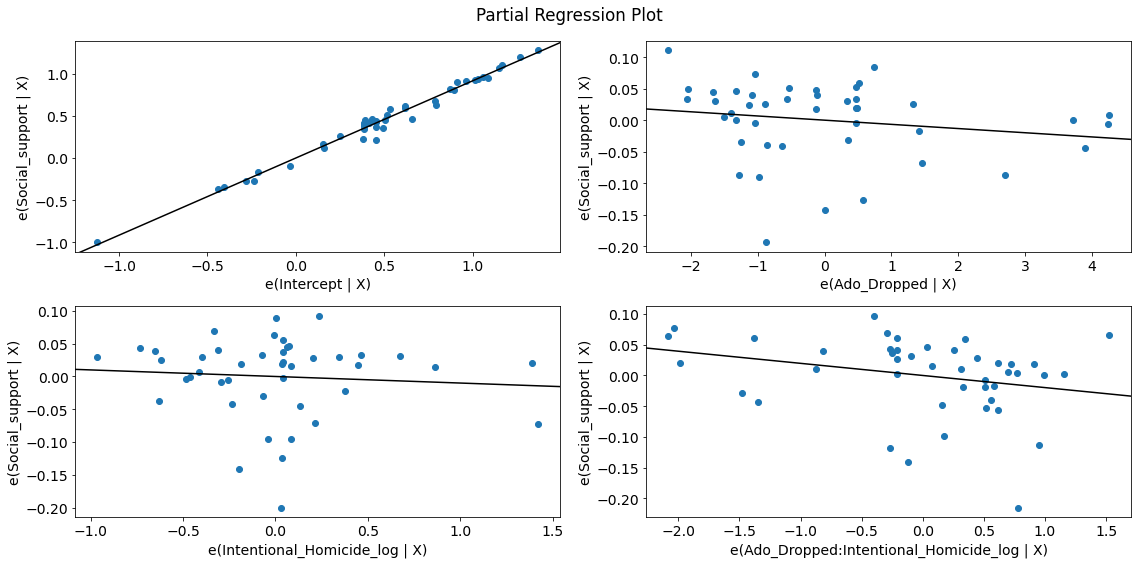

In [56]:
fig = sm.graphics.plot_partregress_grid(lm_all_fix_2015)
fig.tight_layout(pad=1.0)

In [26]:
name = ['Lagrange multiplier statistic', 'p-value']
test = sm.stats.het_breuschpagan(lm_all_fix_2015.resid, lm_all_fix_2015.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 1.8573323114625069),
 ('p-value', 0.6025389497089639)]

In [27]:
sm.stats.durbin_watson(lm_all_fix_2015.resid)

1.8746810172104644

In [28]:
y, X = dmatrices("Social_support ~ Ado_Dropped*Intentional_Homicide_log",
                 data_transformed_Nas_2015, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Feature"] = X.columns

vif.round(2)

,VIF Factor,Feature
0,2.05,Intercept
1,2.78,Ado_Dropped
2,1.68,Intentional_Homicide_log
3,3.57,Ado_Dropped:Intentional_Homicide_log


## Model 2016

In [29]:
lm_all_fix_2016 = ols("Social_support ~ Ado_Dropped*Intentional_Homicide_log", 
                        data = data_transformed_Nas_2016).fit()

print(lm_all_fix_2016.summary())

                            OLS Regression Results                            
Dep. Variable:         Social_support   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     9.709
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           6.10e-05
Time:                        09:12:06   Log-Likelihood:                 73.050
No. Observations:                  44   AIC:                            -138.1
Df Residuals:                      40   BIC:                            -131.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [30]:
lm_cooksd = lm_all_fix_2016.get_influence().cooks_distance[0]

n = len(data_transformed_Nas_2016["Social_support"])

critical_d = 4/n

out_d = lm_cooksd > critical_d

print("Number of outliers:", len(data_transformed_Nas_2016.index[out_d]))

Number of outliers: 5


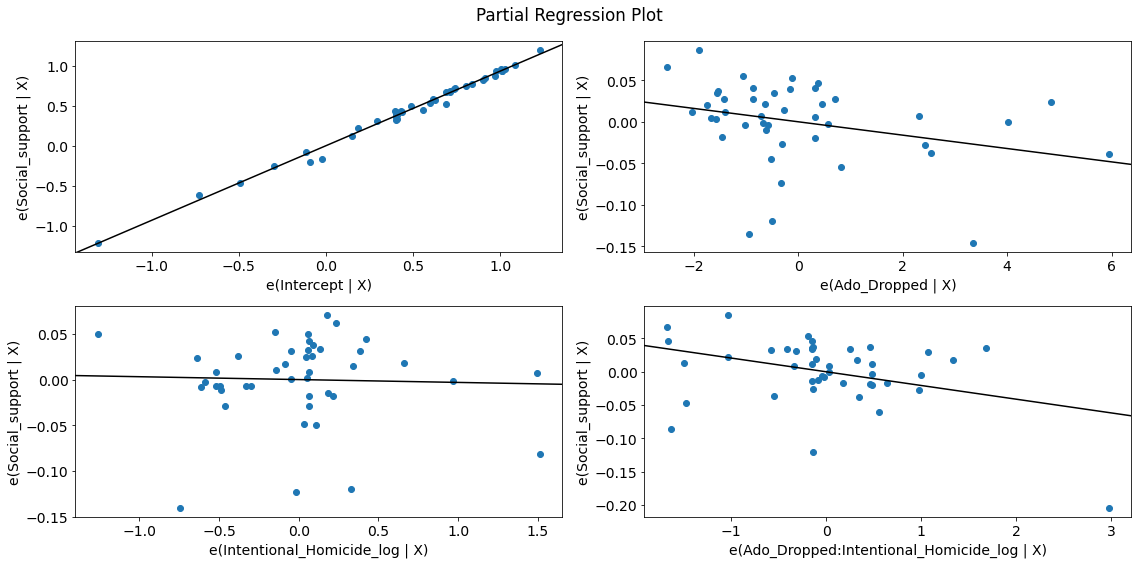

In [57]:
fig = sm.graphics.plot_partregress_grid(lm_all_fix_2016)
fig.tight_layout(pad=1.0)

In [31]:
name = ['Lagrange multiplier statistic', 'p-value']
test = sm.stats.het_breuschpagan(lm_all_fix_2015.resid, lm_all_fix_2015.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 1.8573323114625069),
 ('p-value', 0.6025389497089639)]

In [32]:
sm.stats.durbin_watson(lm_all_fix_2016.resid)

2.00194435806589

In [33]:
y, X = dmatrices("Social_support ~ Ado_Dropped*Intentional_Homicide_log",
                 data_transformed_Nas_2016, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Feature"] = X.columns

vif.round(2)

,VIF Factor,Feature
0,2.10,Intercept
1,1.34,Ado_Dropped
2,1.80,Intentional_Homicide_log
3,2.23,Ado_Dropped:Intentional_Homicide_log


## Model 2017

In [34]:
lm_all_fix_2017 = ols("Social_support ~ Ado_Dropped*Intentional_Homicide_log", 
                        data = data_transformed_Nas_2017).fit()

print(lm_all_fix_2017.summary())

                            OLS Regression Results                            
Dep. Variable:         Social_support   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     3.943
Date:                Wed, 20 Sep 2023   Prob (F-statistic):             0.0148
Time:                        09:12:06   Log-Likelihood:                 62.563
No. Observations:                  44   AIC:                            -117.1
Df Residuals:                      40   BIC:                            -110.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [35]:
lm_cooksd = lm_all_fix_2017.get_influence().cooks_distance[0]

n = len(data_transformed_Nas_2017["Social_support"])

critical_d = 4/n

out_d = lm_cooksd > critical_d

print("Number of outliers:", len(data_transformed_Nas_2017.index[out_d]))

Number of outliers: 4


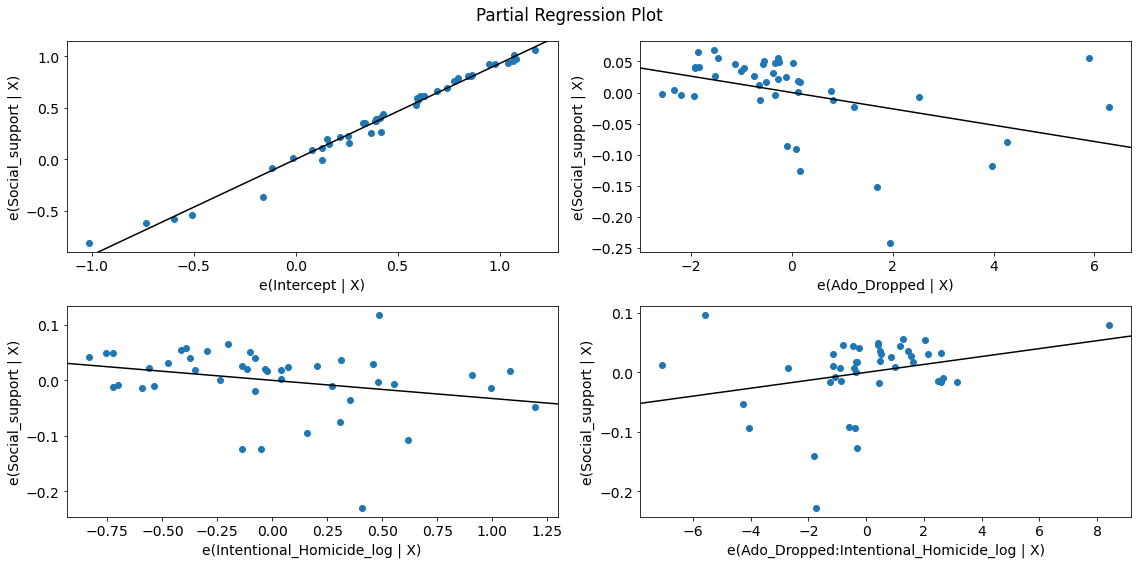

In [58]:
fig = sm.graphics.plot_partregress_grid(lm_all_fix_2017)
fig.tight_layout(pad=1.0)

In [55]:
name = ['Lagrange multiplier statistic', 'p-value']
test = sm.stats.het_breuschpagan(lm_all_fix_2017.resid, lm_all_fix_2017.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 5.845807231166459),
 ('p-value', 0.11935782873914993)]

In [37]:
sm.stats.durbin_watson(lm_all_fix_2017.resid)

1.8553348653150867

In [38]:
y, X = dmatrices("Social_support ~ Ado_Dropped*Intentional_Homicide_log",
                 data_transformed_Nas_2017, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Feature"] = X.columns

vif.round(2)

,VIF Factor,Feature
0,2.40,Intercept
1,3.54,Ado_Dropped
2,1.58,Intentional_Homicide_log
3,4.56,Ado_Dropped:Intentional_Homicide_log


## Model 2018

In [39]:
lm_all_fix_2018 = ols("Social_support ~ Ado_Dropped*Intentional_Homicide_log", 
                        data = data_transformed_Nas_2018).fit()

print(lm_all_fix_2018.summary())

                            OLS Regression Results                            
Dep. Variable:         Social_support   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     2.114
Date:                Wed, 20 Sep 2023   Prob (F-statistic):              0.114
Time:                        09:12:07   Log-Likelihood:                 69.403
No. Observations:                  43   AIC:                            -130.8
Df Residuals:                      39   BIC:                            -123.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [40]:
lm_cooksd = lm_all_fix_2018.get_influence().cooks_distance[0]

n = len(data_transformed_Nas_2018["Social_support"])

critical_d = 4/n

out_d = lm_cooksd > critical_d

print("Number of outliers:", len(data_transformed_Nas_2018.index[out_d]))

Number of outliers: 3


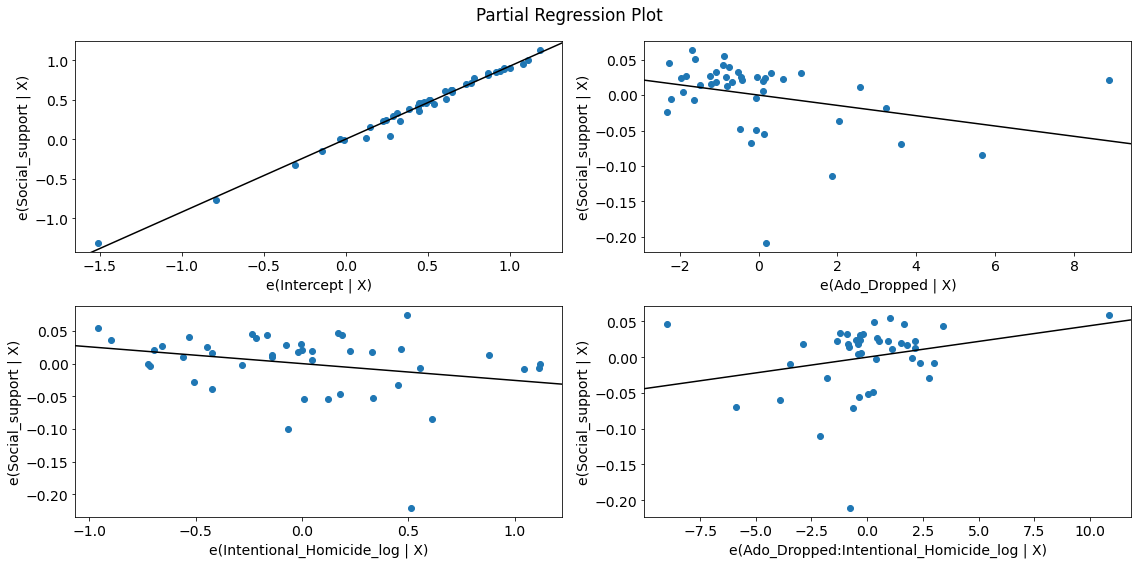

In [59]:
fig = sm.graphics.plot_partregress_grid(lm_all_fix_2018)
fig.tight_layout(pad=1.0)

In [41]:
name = ['Lagrange multiplier statistic', 'p-value']
test = sm.stats.het_breuschpagan(lm_all_fix_2015.resid, lm_all_fix_2015.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 1.8573323114625069),
 ('p-value', 0.6025389497089639)]

In [42]:
sm.stats.durbin_watson(lm_all_fix_2018.resid)

1.8731166020533745

In [43]:
y, X = dmatrices("Social_support ~ Ado_Dropped*Intentional_Homicide_log",
                 data_transformed_Nas_2018, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Feature"] = X.columns

vif.round(2)

,VIF Factor,Feature
0,2.19,Intercept
1,3.31,Ado_Dropped
2,1.48,Intentional_Homicide_log
3,4.14,Ado_Dropped:Intentional_Homicide_log


## Predicting start

In [44]:
predictions_2015 = lm_all_fix_2015.predict(data_transformed_Nas_2019) 
predictions_2016 = lm_all_fix_2016.predict(data_transformed_Nas_2019) 
predictions_2017 = lm_all_fix_2017.predict(data_transformed_Nas_2019) 
predictions_2018 = lm_all_fix_2018.predict(data_transformed_Nas_2019) 

In [45]:
data_transformed_Nas_2019["Predictions_2015"] = predictions_2015
data_transformed_Nas_2019["Predictions_2016"] = predictions_2016
data_transformed_Nas_2019["Predictions_2017"] = predictions_2017
data_transformed_Nas_2019["Predictions_2018"] = predictions_2018

In [46]:
data_transformed_Nas_2019["Predictions_Estimate"] = (data_transformed_Nas_2019["Predictions_2015"] +
                                                     data_transformed_Nas_2019["Predictions_2016"] + 
                                                     data_transformed_Nas_2019["Predictions_2017"] + 
                                                     data_transformed_Nas_2019["Predictions_2018"]) / 4

In [47]:
## 2015

SS_RES = sum((data_transformed_Nas_2019["Social_support"] - 
         data_transformed_Nas_2019["Predictions_2015"])**2)

SS_TOT = sum((data_transformed_Nas_2019["Social_support"] - 
         np.mean(data_transformed_Nas_2019["Social_support"]))**2)

1 - (SS_RES / SS_TOT)

-0.29947531489905277

In [48]:
## 2016

SS_RES = sum((data_transformed_Nas_2019["Social_support"] - 
         data_transformed_Nas_2019["Predictions_2016"])**2)

SS_TOT = sum((data_transformed_Nas_2019["Social_support"] - 
         np.mean(data_transformed_Nas_2019["Social_support"]))**2)

1 - (SS_RES / SS_TOT)

-0.22881543737820875

In [49]:
## 2017

SS_RES = sum((data_transformed_Nas_2019["Social_support"] - 
         data_transformed_Nas_2019["Predictions_2017"])**2)

SS_TOT = sum((data_transformed_Nas_2019["Social_support"] - 
         np.mean(data_transformed_Nas_2019["Social_support"]))**2)

1 - (SS_RES / SS_TOT)

-0.036393659260954836

In [50]:
## 2018

SS_RES = sum((data_transformed_Nas_2019["Social_support"] - 
         data_transformed_Nas_2019["Predictions_2018"])**2)

SS_TOT = sum((data_transformed_Nas_2019["Social_support"] - 
         np.mean(data_transformed_Nas_2019["Social_support"]))**2)

1 - (SS_RES / SS_TOT)

0.12452605258449101

In [51]:
## Estimate

SS_RES = sum((data_transformed_Nas_2019["Social_support"] - 
         data_transformed_Nas_2019["Predictions_Estimate"])**2)

SS_TOT = sum((data_transformed_Nas_2019["Social_support"] - 
         np.mean(data_transformed_Nas_2019["Social_support"]))**2)

1 - (SS_RES / SS_TOT)

0.03541360690761097

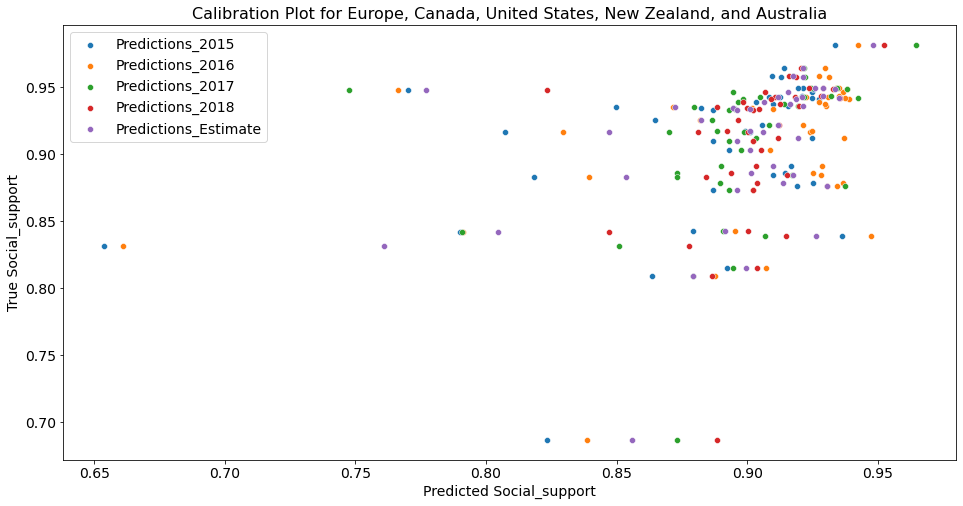

In [60]:
ax1 = sns.scatterplot(
                 data = data_transformed_Nas_2019,
                    y = "Social_support", 
                    x = "Predictions_2015")

ax2 = sns.scatterplot( 
                 data = data_transformed_Nas_2019,
                    y = "Social_support", 
                    x = "Predictions_2016")

ax3 = sns.scatterplot( 
                 data = data_transformed_Nas_2019,
                    y = "Social_support", 
                    x = "Predictions_2017")


ax4 = sns.scatterplot( 
                 data = data_transformed_Nas_2019,
                    y = "Social_support", 
                    x = "Predictions_2018")


ax5 = sns.scatterplot( 
                 data = data_transformed_Nas_2019,
                    y = "Social_support", 
                    x = "Predictions_Estimate")

plt.legend(labels = ['Predictions_2015', 
                     'Predictions_2016', 
                     'Predictions_2017', 
                     'Predictions_2018', 
                     'Predictions_Estimate'])

ax1.set_ylabel("True Social_support", fontsize = 14)
ax1.set_xlabel("Predicted Social_support", fontsize = 14)

ax1.set_title("Calibration Plot for Europe, Canada, United States, New Zealand, and Australia", fontsize = 16)

#plt.savefig('ax1.png')